# 5. Generar índices normalizados (NDVI)
### Por: David Alonso Rueda Rodríguez
#### Esta actividad requiere la ejecución de las siguentes librerías:
- earthpy
- rasterio

In [2]:
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as ras
import numpy as np

In [3]:
landsat_url = 'src/Landsat/earthpy/Landsat_AOI.tif'

In [4]:
with ras.open(landsat_url) as src:
    landsat = src.read()
    out_meta = src.profile

In [9]:
landsat[2]

array([[8775, 7618, 8506, ..., 6017, 6093, 6060],
       [9145, 7383, 8207, ..., 5949, 6146, 6073],
       [7961, 7676, 8049, ..., 6006, 6160, 6191],
       ...,
       [6514, 6540, 6530, ..., 8356, 8948, 8249],
       [6542, 6562, 6526, ..., 8989, 9376, 8025],
       [6542, 6600, 6557, ..., 9020, 8563, 8092]], dtype=uint16)

In [8]:
# Aplicar índice normalizado
landsat_ndvi = es.normalized_diff(landsat[3], landsat[2])

In [9]:
landsat_ndvi.dtype

dtype('float64')

In [10]:
out_meta['count'] = 1
out_meta['dtype'] = 'float64'
out_meta

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 667, 'height': 678, 'count': 1, 'crs': CRS.from_epsg(32618), 'transform': Affine(30.0, 0.0, 437865.0,
       0.0, -30.0, 510765.0), 'tiled': False, 'interleave': 'pixel'}

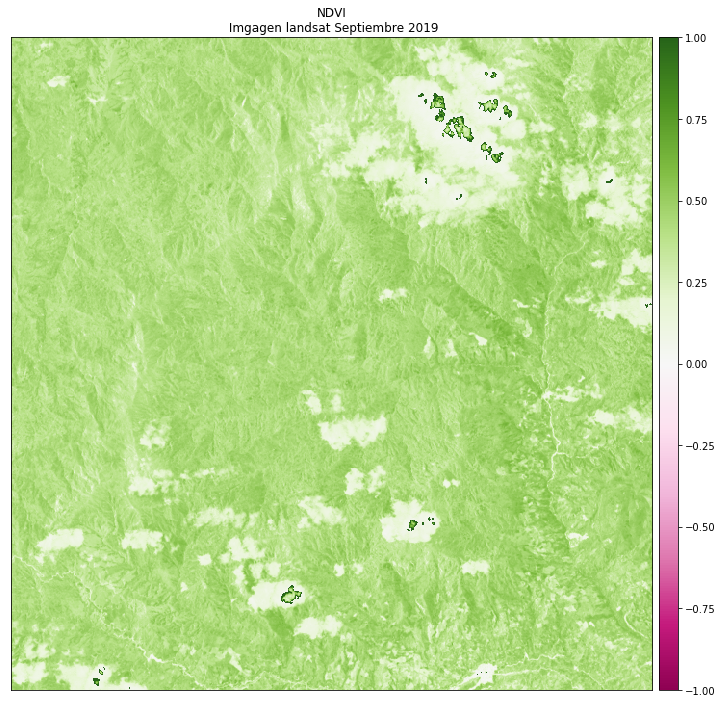

In [12]:
#
# Verificar el resultado de la operación
title="NDVI\n Imgagen landsat Septiembre 2019"
ep.plot_bands(landsat_ndvi, figsize=(12,12), vmin=-1, vmax=1, scale=False,cmap='PiYG', title=title)

In [13]:
# Guardar archivo en directorio de interés
output_file = 'src/Landsat/earthpy/Landsat_NDVI.tif'
with ras.open(output_file, 'w', **out_meta) as dst:
    dst.write(landsat_ndvi, 1)

Procedimiento alternativo para creación de NDVI
https://medium.com/analytics-vidhya/satellite-imagery-analysis-with-python-3f8ccf8a7c32